In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("Customer Churn Dataset Task 1.csv")
df.head

<bound method NDFrame.head of     customer_id  age  gender  tenure_months  monthly_usage_hours  \
0         C0001   50    Male             38                   29   
1         C0002   39  Female             33                   32   
2         C0003   25  Female             51                   32   
3         C0004   44    Male             11                   16   
4         C0005   46  Female             51                   46   
..          ...  ...     ...            ...                  ...   
495       C0496   27  Female              8                   74   
496       C0497   52  Female             27                   57   
497       C0498   26    Male             53                   21   
498       C0499   30  Female              8                   34   
499       C0500   36  Female             29                   97   

     support_tickets subscription_type  monthly_charges payment_method  churn  
0                  4          Standard              799     NetBanking   

In [17]:
df.isnull().sum()

customer_id            0
age                    0
gender                 0
tenure_months          0
monthly_usage_hours    0
support_tickets        0
subscription_type      0
monthly_charges        0
payment_method         0
churn                  0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
df_copy.drop('customer_id', axis=1, inplace=True)
le = LabelEncoder()
df_copy["gender"] = le.fit_transform(df_copy["gender"])
df_copy["subscription_type"] = le.fit_transform(df_copy["subscription_type"])
df_copy["payment_method"] = le.fit_transform(df_copy["payment_method"])
df_copy.head()

,age,gender,tenure_months,monthly_usage_hours,support_tickets,subscription_type,monthly_charges,payment_method,churn
0,50,1,38,29,4,2,799,1,0
1,39,0,33,32,4,0,399,1,0
2,25,0,51,32,2,2,799,2,0
3,44,1,11,16,3,1,1499,0,0
4,46,0,51,46,1,1,1499,2,0


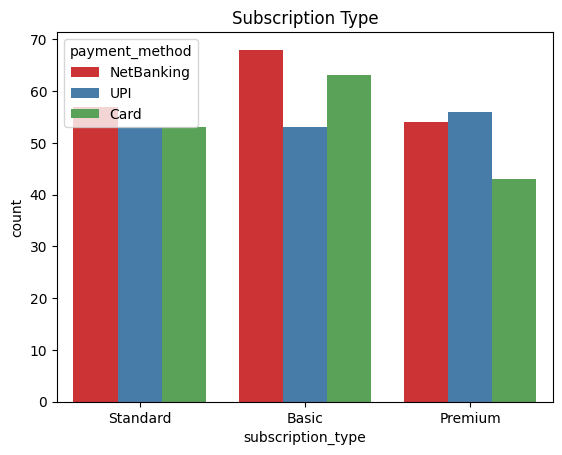

In [19]:
plt.Figure(figsize=(6,4))
sns.countplot(data=df,x="subscription_type",hue="payment_method",palette="Set1")
plt.title("Subscription Type")
plt.show()

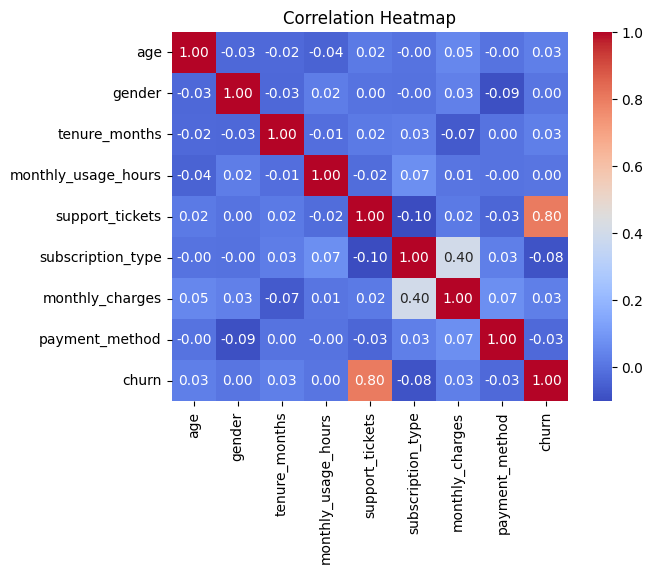

In [20]:
corr=df_copy.corr()
plt.Figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
test_data = df_copy["churn"]
features=['age', 'gender', 'tenure_months', 'monthly_usage_hours',
       'subscription_type', 'monthly_charges','payment_method']
train_data = df_copy[features]
x_train, x_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
pred=model.predict(x_test)


Train Accuracy: 1.0000
Test Accuracy: 0.6400
5-Fold CV Mean Accuracy: 0.67
Model seems to generalize well.

              precision    recall  f1-score   support

           0       0.70      0.87      0.78        71
           1       0.18      0.07      0.10        29

    accuracy                           0.64       100
   macro avg       0.44      0.47      0.44       100
weighted avg       0.55      0.64      0.58       100



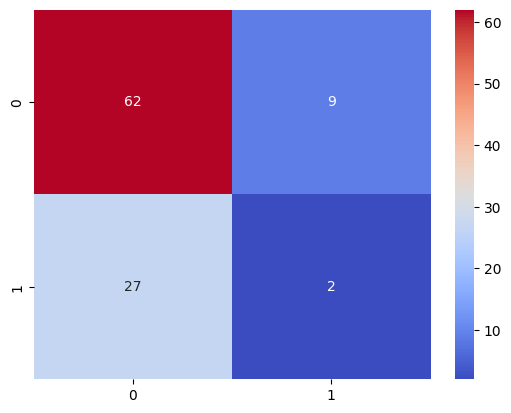

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

cv_scores = cross_val_score(model, train_data, test_data, cv=5)
cv_mean = cv_scores.mean()
    
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("5-Fold CV Mean Accuracy:",cv_mean)
    
# Overfitting check
if test_acc < cv_mean - 0.05:
    print("⚠️ Possible overfitting detected (test accuracy below CV mean).\n")
else:
    print("Model seems to generalize well.\n")
    
print(classification_report(y_test,pred))
cm=confusion_matrix(y_test,pred)
plt.Figure(figsize=(6,4))
sns.heatmap(data=cm,cmap="coolwarm",annot=True,fmt="d")
plt.show()

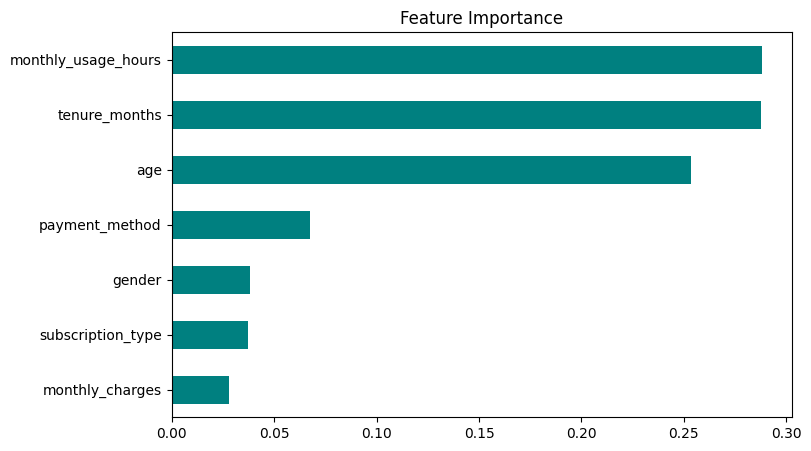

In [24]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=train_data.columns).sort_values(ascending=True)
    
plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh', color='teal')
plt.title("Feature Importance")
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.45      0.56        71
           1       0.32      0.62      0.42        29

    accuracy                           0.50       100
   macro avg       0.53      0.54      0.49       100
weighted avg       0.62      0.50      0.52       100



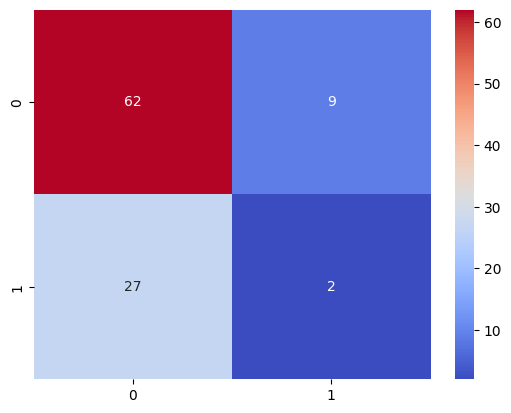

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(df_copy[features])
x_train, x_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2, random_state=42)
model=LogisticRegression(max_iter=1000,random_state=42,class_weight="balanced")
model.fit(x_train,y_train)
log_predict=model.predict(x_test)
print(classification_report(y_test,log_predict))
cm=confusion_matrix(y_test,pred)
plt.Figure(figsize=(6,4))
sns.heatmap(data=cm,cmap="coolwarm",annot=True,fmt="d")
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        71
           1       0.33      0.03      0.06        29

    accuracy                           0.70       100
   macro avg       0.52      0.50      0.44       100
weighted avg       0.60      0.70      0.60       100



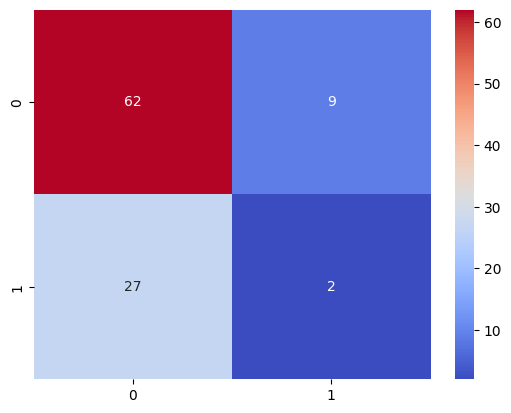

In [26]:
from sklearn.svm import SVC
model=SVC(kernel="rbf",C=10,gamma=0.1,class_weight="balanced")
model.fit(x_train,y_train)
svm_pred=model.predict(x_test)
print(classification_report(y_test,svm_pred))
cm=confusion_matrix(y_test,pred)
plt.Figure(figsize=(6,4))
sns.heatmap(data=cm,cmap="coolwarm",annot=True,fmt="d")
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        71
           1       0.42      0.34      0.38        29

    accuracy                           0.67       100
   macro avg       0.58      0.57      0.58       100
weighted avg       0.65      0.67      0.66       100



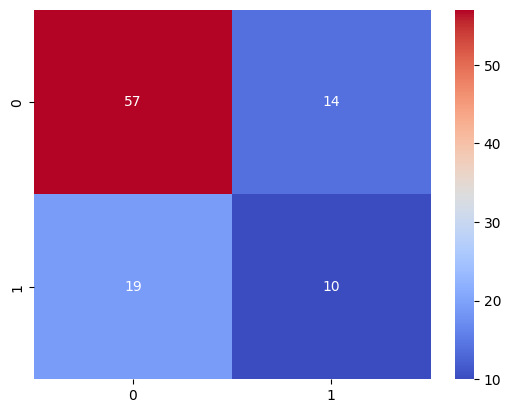

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    eval_metric="logloss"
)
model.fit(x_train,y_train)
xgb_predict=model.predict(x_test)
print(classification_report(y_test,xgb_predict))
cm=confusion_matrix(y_test,xgb_predict)
plt.Figure(figsize=(6,4))
sns.heatmap(data=cm,cmap="coolwarm",annot=True,fmt="d")
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        71
           1       0.30      0.21      0.24        29

    accuracy                           0.63       100
   macro avg       0.51      0.50      0.50       100
weighted avg       0.59      0.63      0.61       100



<Axes: >

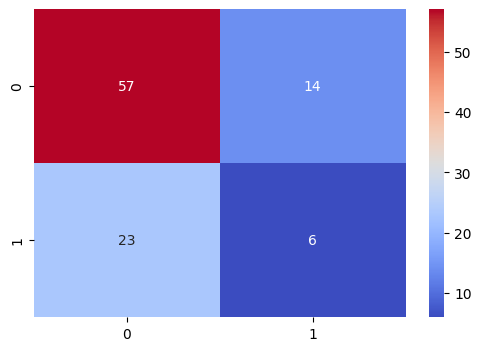

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,
    weights="uniform",
    algorithm="auto",
    leaf_size=30,
    p=2,
    metric="minkowski",
    n_jobs=-1
)
model.fit(x_train,y_train)
knn_predict=model.predict(x_test)
print(classification_report(y_test,knn_predict))
cm=confusion_matrix(y_test,knn_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm,cmap="coolwarm",annot=True,fmt="d")
plt.show()